In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
%matplotlib inline
sns.set()

In [2]:
dataset = pd.read_csv("Train.csv")
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# def calc_vif(X):

#     # Calculating VIF
#     vif = pd.DataFrame()
#     vif["variables"] = X.columns
#     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#     return(vif)

In [4]:
# VIF = calc_vif(dataset)
# VIF

In [5]:
# # from sklearn.preprocessing import scale
# columns = dataset.drop(['InvoiceDate', 'UnitPrice'], axis = 1).columns
# for column in columns:
#     dataset[column] = (dataset[column] - dataset[column].mean()) / dataset[column].std()
# #     dataset[column] = (dataset[column] - min(dataset[column])) / (max(dataset[column]) - min(dataset[column]))

In [ ]:
dataset.drop(dataset[dataset['UnitPrice'] >= 8000].index, inplace = True)

In [7]:
# x = dataset.iloc[:, [0, 1, 2, 3, 6, 7]].values
x = dataset.iloc[:, [1, 2, 3, 6, 7]].values
y = dataset.iloc[:, [5]].values

In [8]:
dataset.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284778.000000,284778.000000,284778.000000,284778.000000,284778.000000,284778.000000,284778.000000
mean,9955.323241,1573.371999,2023.953058,12.028559,3.285803,15288.222345,32.823831
std,5551.474248,843.589446,1089.815303,295.112622,24.124866,1714.341949,6.743623
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,4161.060000,18287.000000,36.000000


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(f'Training Features Shape: {x_train.shape}')
print(f'Training Labels Shape: {y_train.shape}')
print(f'Validation Features Shape: {x_valid.shape}')
print(f'Validation Labels Shape: {y_valid.shape}')

Training Features Shape: (227822, 5)
Training Labels Shape: (227822, 1)
Validation Features Shape: (56956, 5)
Validation Labels Shape: (56956, 1)


# Define Functions for Residuals and RMSE

In [10]:
# residuals_train1 = np.subtract(y_train, pred_train1)
# Using For loop due to calculating residuals require more RAM

def residuals(labels, predicted):
    residuals = []
    for i in range(len(labels)):
        residuals.append(labels[i] - predicted[i])
    return residuals

In [11]:
def rmse(label, predicted):
    rmse = []
    for i in range(len(label)):
        rmse.append(np.power((label[i] - predicted[i]), 2))
    rmse = np.mean(rmse)
    rmse = np.sqrt(rmse)
    rmse = round(rmse, 3)
    return rmse

# XGBoost

In [22]:
from xgboost import XGBRegressor
regressor3 = XGBRegressor(booster = 'gbtree', eta = 0.02, max_depth = 5, random_state = 42, verbosity = 0)
regressor3.fit(x_train, y_train)
pred_train3 = regressor3.predict(x_train)

/Users/arshharkial/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

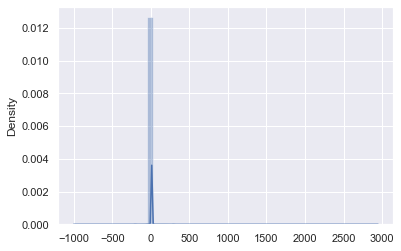

In [23]:
residuals_train3 = residuals(y_train, pred_train3)
sns.distplot(residuals_train3)

In [24]:
rms_train3 = rmse(y_train, pred_train3)
print(rms_train3)

16.638


/Users/arshharkial/Library/Python/3.8/lib/python/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

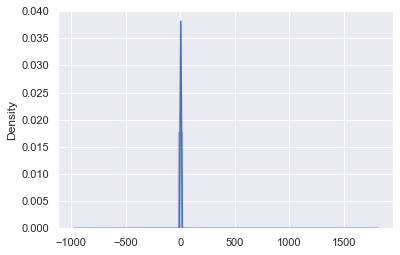

In [25]:
pred_valid3 = regressor3.predict(x_valid)
residuals_valid3 = residuals(y_valid, pred_valid3)
sns.distplot(residuals_valid3)

In [26]:
rms_valid3 = rmse(y_valid, pred_valid3)
print(rms_valid3)

17.26


In [182]:
def RSQR(label, predicted, mean):
    SSRES = []
    SSTOT = []
    n = len(label)
    k = 2
    for i in range(n):
        SSRES.append(np.power((label[i] - predicted[i]), 2))
        SSTOT.append(np.power((label[i] - mean), 2))
    SSRES = np.sum(SSRES)
    SSTOT = np.sum(SSTOT)
    R2 = 1 - (SSRES / SSTOT)
    ADJR2 = 1 - ((1 - R2)*(n - 1) / (n - k - 1))
    return round(R2, 3), round(ADJR2, 3)

In [183]:
R2_train, ADJR2_train = RSQR(y_train, pred_train3, np.mean(y_train))
R2_valid, ADJR2_valid = RSQR(y_valid, pred_valid3, np.mean(y_valid))
print(f'Training R2: {R2_train}')
print(f'Training Adj R2: {ADJR2_train}')
print(f'Validation R2: {R2_valid}')
print(f'Validation Adj R2: {ADJR2_valid}')

Training R2: 0.451
Training Adj R2: 0.451
Validation R2: 0.238
Validation Adj R2: 0.238


In [150]:
test = pd.read_csv("Test.csv")
# print(test.head())
# # columns = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'CustomerID', 'Country']
# # for column in columns:
# #     test[column] = np.log1p(test[column])
test = test.iloc[:, [1, 2, 3, 5, 6]].values

# pred_test = pd.DataFrame(regressor.predict(test),
#                         columns = ['UnitPrice'])
# pred_test.to_csv('ArshdeepSingh.csv', index = False, header = True)
pd.DataFrame(regressor3.predict(test),
             columns = ['UnitPrice']).to_csv('ArshdeepSingh.csv',
                                             index = False, header = True)

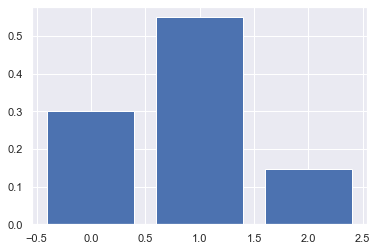

[0.30194327 0.55028605 0.14777076]
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'CustomerID', 'Country'],
      dtype='object')


In [142]:
plt.bar(range(len(regressor3.feature_importances_)), regressor3.feature_importances_)
plt.show()
print(regressor3.feature_importances_)
print(dataset.drop(['UnitPrice'], axis = 1).columns)

In [171]:
import numpy as np
import pandas as pd


Plot correlation heatmap
Look for outliers (Inter quantile range) < 0.2 weak
Check skewness
Do gridsearch in model training, cv = 5
80-20 data split

In [172]:
dataset = pd.read_csv('Train.csv')
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [173]:
dataset.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regressor = LinearRegression(n_jobs = -1)
regressor.fit(x_train, y_train)
pred_valid = regressor.predict(x_valid)
print(rmse(y_valid, pred_valid))

In [ ]:
print(rmse(y_train, regressor.predict(x_train)))

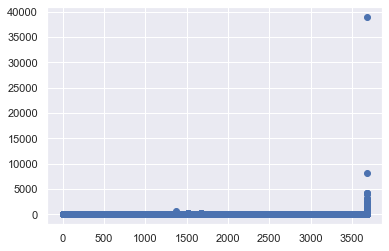

In [4]:
plt.scatter(x = dataset['StockCode'], y = dataset['UnitPrice'])
plt.show()

KeyboardInterrupt: 

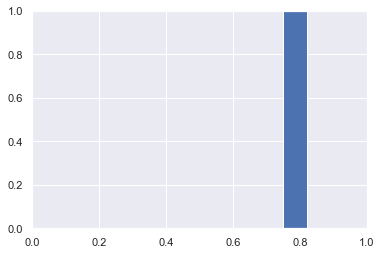

In [7]:
dataset.plot.bar()